<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/An%C3%A1lise_de_A%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [91]:
# Definir ação
acao_definida = 'CMIG4'

In [92]:
# Definir periodo de observação
periodo_definido = '5y'

In [93]:
# Definir Benchmark
benchmark_definido = '^BVSP'

In [94]:
acao_definida = acao_definida + '.SA'

In [119]:
acao = yf.download(acao_definida, period=periodo_definido, auto_adjust=True, actions=True)
benchmark = yf.download(benchmark_definido, period=periodo_definido)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [120]:
benchmark.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03
mean,106729.841935,107746.820968,105716.122581,106749.474194,106749.474194,9.508873e+06
std,11306.068501,11123.382987,11434.166982,11291.370792,11291.370792,4.030439e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,100001.500000,101022.250000,98973.750000,100006.750000,100006.750000,6.048525e+06
50%,107736.000000,108665.000000,106887.000000,107730.000000,107730.000000,9.778900e+06
75%,115237.250000,116204.250000,114379.500000,115309.500000,115309.500000,1.207170e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.602930e+07


In [97]:
acao.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03,1240.000000,1240.000000
mean,7.814029,7.925274,7.695256,7.810852,1.346269e+07,0.003632,0.002787
std,2.338071,2.355253,2.318591,2.336257,6.767439e+06,0.035012,0.056872
min,3.562485,3.781996,3.448156,3.621936,0.000000e+00,0.000000,0.000000
25%,6.071926,6.155983,5.968817,6.066810,8.934240e+06,0.000000,0.000000
50%,7.042190,7.120543,6.958835,7.059688,1.177686e+07,0.000000,0.000000
75%,9.858438,9.996516,9.688167,9.841009,1.638948e+07,0.000000,0.000000
max,12.897855,13.094919,12.819030,12.956974,6.710943e+07,0.597418,1.300000


In [98]:
acao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-10-29 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1240 non-null   float64
 1   High          1240 non-null   float64
 2   Low           1240 non-null   float64
 3   Close         1240 non-null   float64
 4   Volume        1240 non-null   int64  
 5   Dividends     1240 non-null   float64
 6   Stock Splits  1240 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.5 KB


In [102]:
acao.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [99]:
acao.index

DatetimeIndex(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-12',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=1240, freq=None)

In [100]:
acao.shape

(1240, 7)

In [101]:
acao.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: >

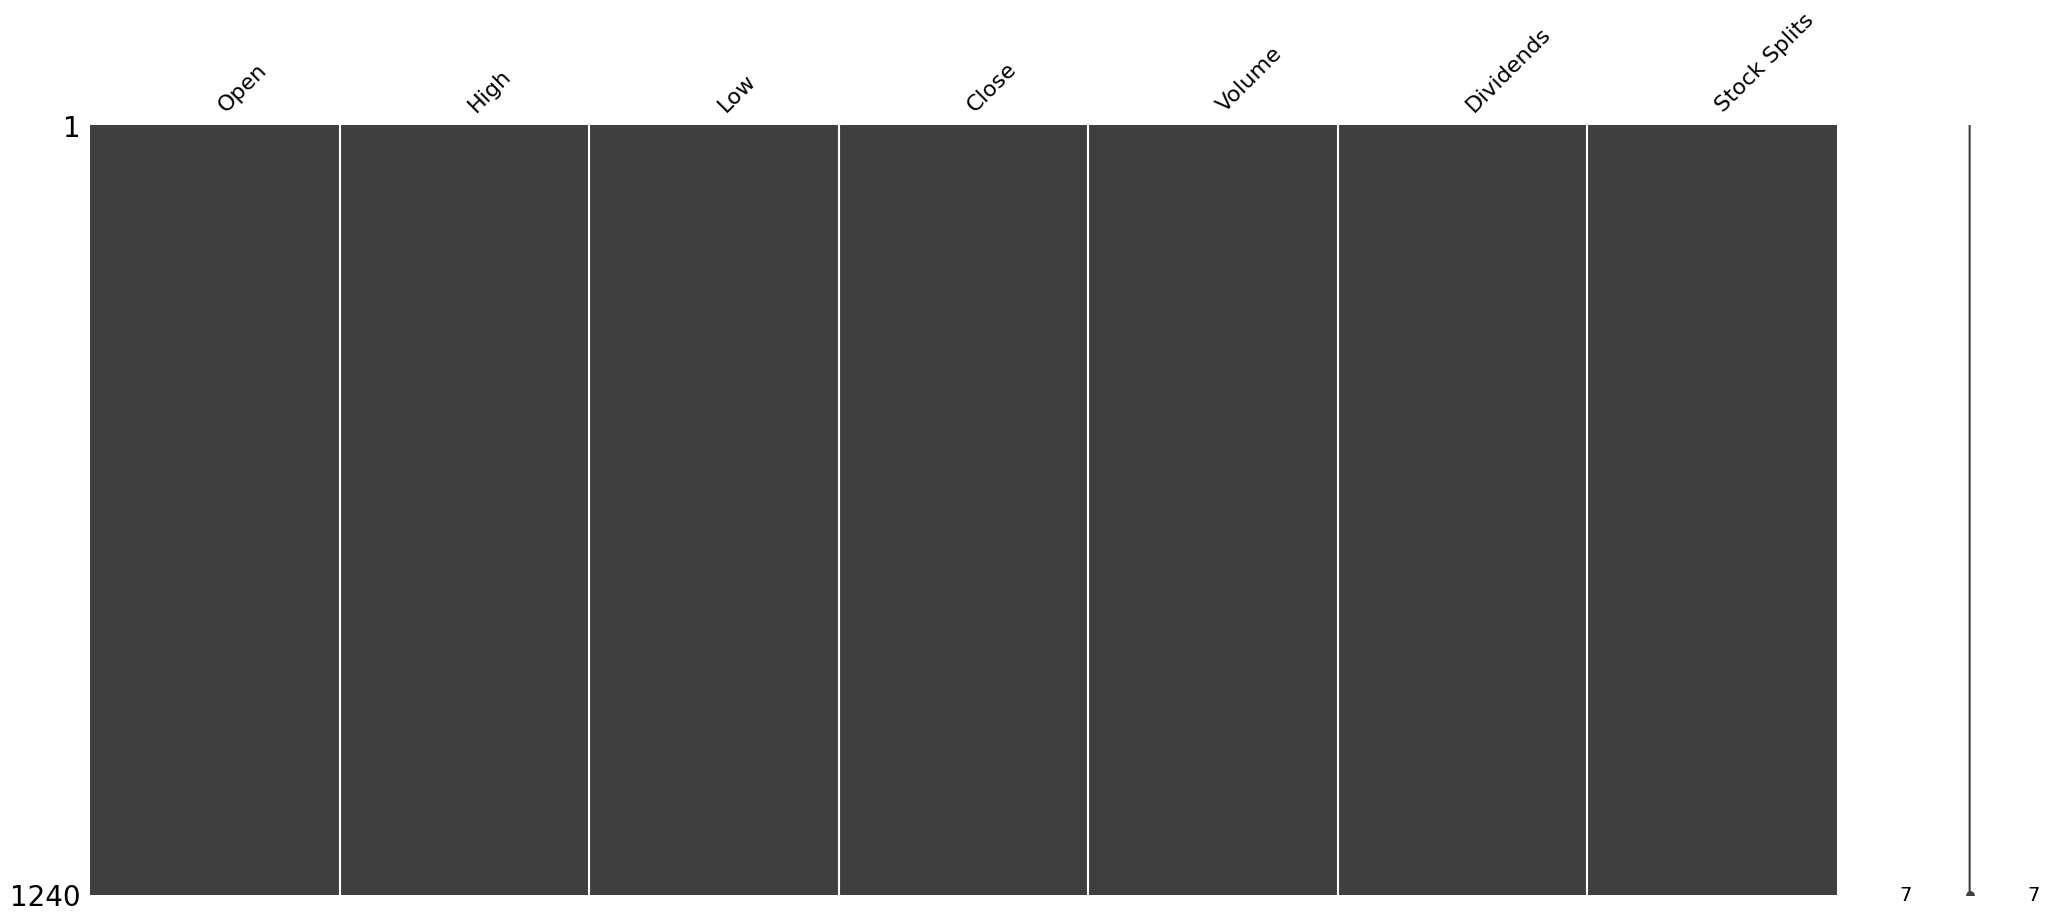

In [103]:
msno.matrix(acao)

<Axes: >

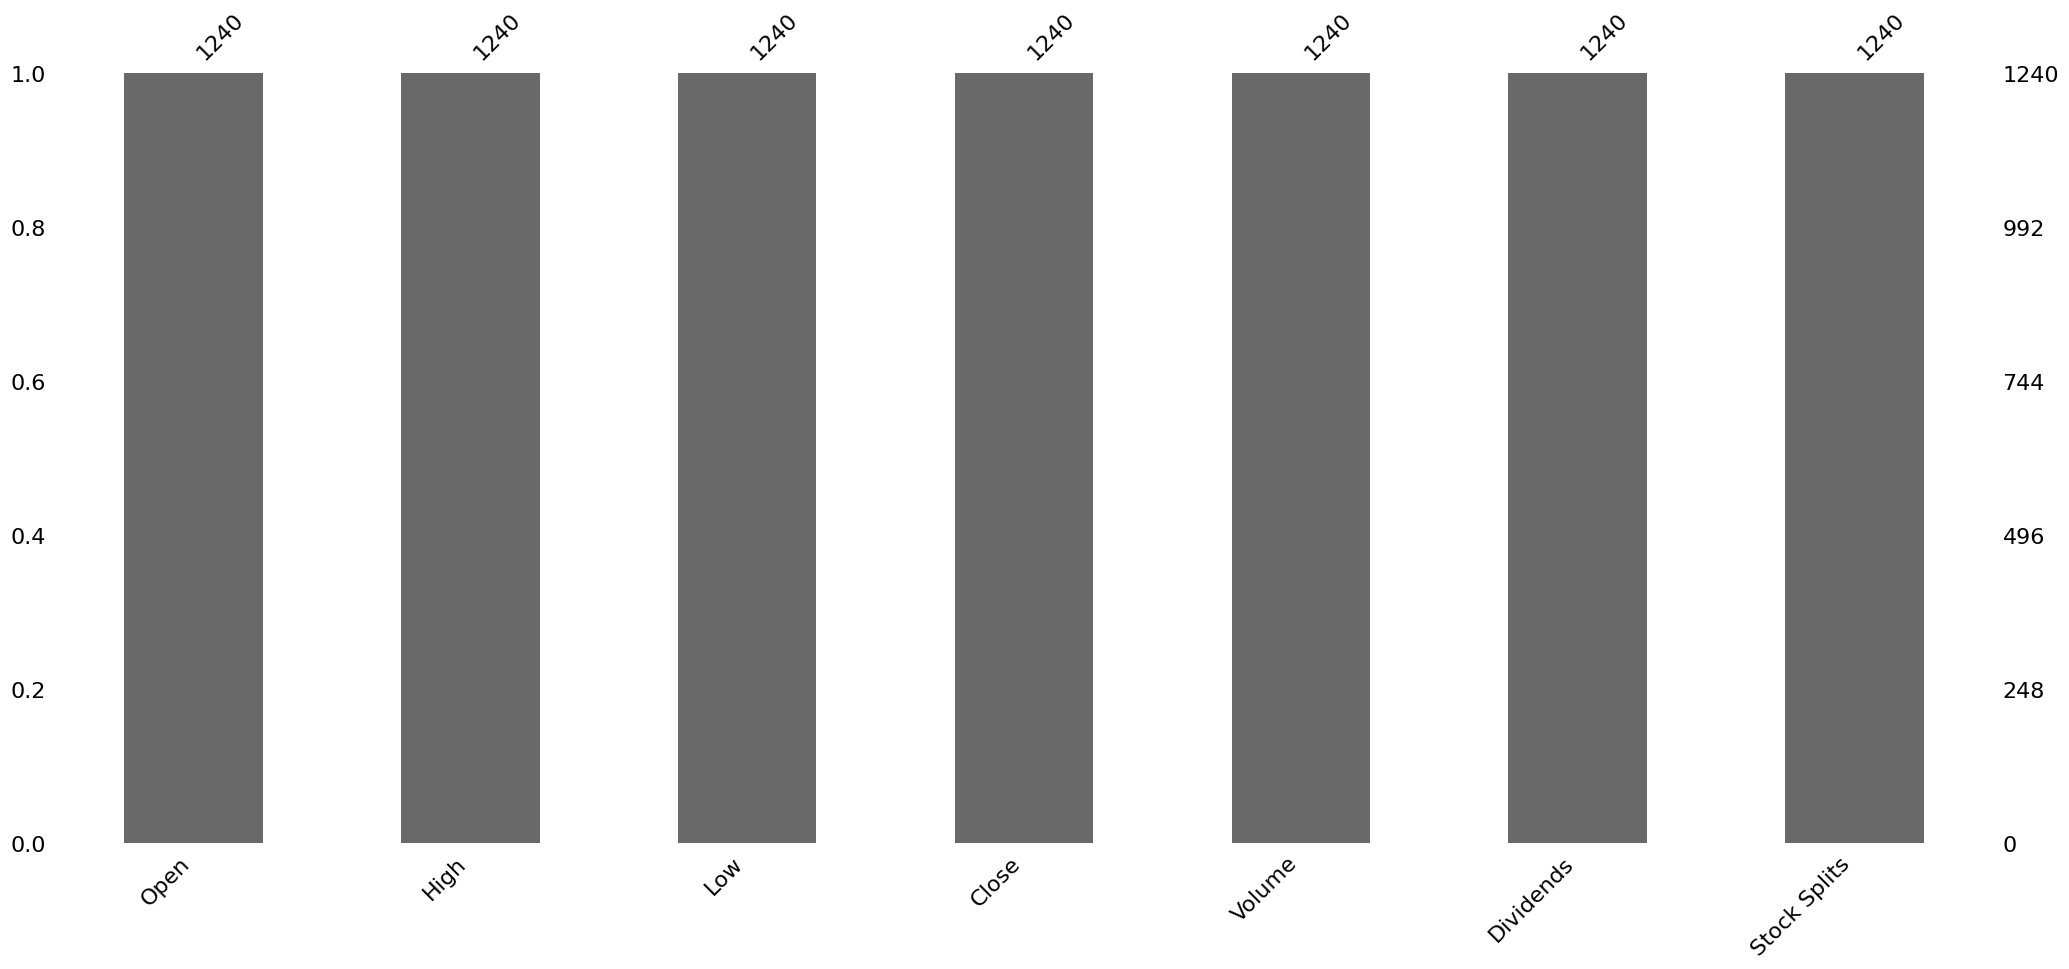

In [104]:
msno.bar(acao)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

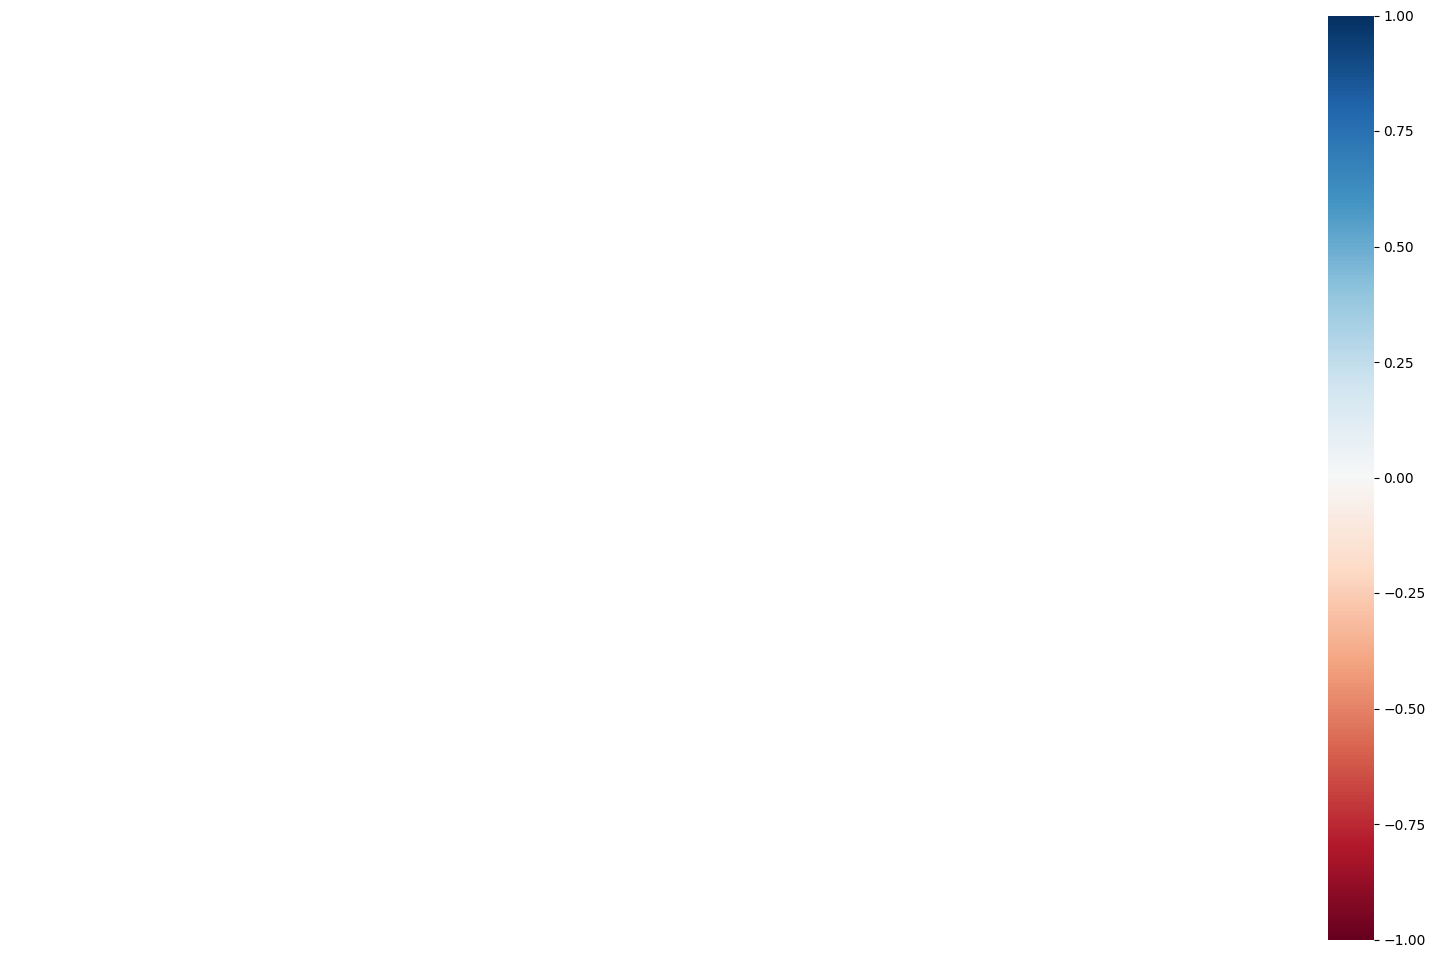

In [105]:
msno.heatmap(acao)

In [106]:
acao = acao.asfreq('D')
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0
2018-10-30,4.892267,4.926629,4.664619,4.836429,50919894.0,0.0,0.0
2018-10-31,4.857905,4.892266,4.707572,4.737638,26771033.0,0.0,0.0
2018-11-01,4.767706,4.866496,4.703277,4.720459,33154581.0,0.0,0.0
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-10-23,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0
2023-10-24,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0
2023-10-25,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0


In [107]:
acao.fillna(method='ffill', inplace=True)
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0
2018-10-30,4.892267,4.926629,4.664619,4.836429,50919894.0,0.0,0.0
2018-10-31,4.857905,4.892266,4.707572,4.737638,26771033.0,0.0,0.0
2018-11-01,4.767706,4.866496,4.703277,4.720459,33154581.0,0.0,0.0
2018-11-02,4.767706,4.866496,4.703277,4.720459,33154581.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0
2023-10-24,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0
2023-10-25,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0


In [108]:
acao['Rentabilidade'] = acao['Close'].pct_change()*100
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-29,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0,NaN
2018-10-30,4.892267,4.926629,4.664619,4.836429,50919894.0,0.0,0.0,-1.141345
2018-10-31,4.857905,4.892266,4.707572,4.737638,26771033.0,0.0,0.0,-2.042636
2018-11-01,4.767706,4.866496,4.703277,4.720459,33154581.0,0.0,0.0,-0.362627
2018-11-02,4.767706,4.866496,4.703277,4.720459,33154581.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2023-10-23,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0,0.846735
2023-10-24,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0,0.167930
2023-10-25,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0,-0.670578


In [109]:
moving_average_50 = acao.rolling(50).mean()
moving_average_50

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-10-23,12.330695,12.440752,12.174561,12.287971,9181186.0,0.003799,0.0,-0.055120
2023-10-24,12.325559,12.434237,12.167793,12.281817,9226096.0,0.003799,0.0,-0.045341
2023-10-25,12.320193,12.427706,12.163192,12.277019,9219800.0,0.003799,0.0,-0.034598


In [110]:
moving_average_200 = acao.iloc[:,0:4].rolling(200).mean()
moving_average_200

,Open,High,Low,Close
Date,,,,
2018-10-29,NaN,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-10-23,12.118529,12.244793,11.970263,12.108274
2023-10-24,12.122659,12.248058,11.973587,12.111710
2023-10-25,12.126239,12.251072,11.976912,12.114746


In [121]:
benchmark = benchmark.asfreq('D')
benchmark

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,85728.0,88377.0,82783.0,83797.0,83797.0,7733900.0
2018-10-30,83802.0,86990.0,83802.0,86886.0,86886.0,6556900.0
2018-10-31,86889.0,88028.0,86213.0,87424.0,87424.0,5889800.0
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800.0
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500.0


In [123]:
benchmark.fillna(method='ffill', inplace=True)
benchmark

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,85728.0,88377.0,82783.0,83797.0,83797.0,7733900.0
2018-10-30,83802.0,86990.0,83802.0,86886.0,86886.0,6556900.0
2018-10-31,86889.0,88028.0,86213.0,87424.0,87424.0,5889800.0
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0
2018-11-02,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0
...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800.0
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500.0


In [124]:
benchmark['Rentabilidade'] = benchmark['Close'].pct_change()*100
benchmark

,Open,High,Low,Close,Adj Close,Volume,Rentabilidade
Date,,,,,,,
2018-10-29,85728.0,88377.0,82783.0,83797.0,83797.0,7733900.0,NaN
2018-10-30,83802.0,86990.0,83802.0,86886.0,86886.0,6556900.0,3.686289
2018-10-31,86889.0,88028.0,86213.0,87424.0,87424.0,5889800.0,0.619202
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0,1.138131
2018-11-02,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0,0.000000
...,...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800.0,-0.326985
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800.0,0.866250
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500.0,-0.819254


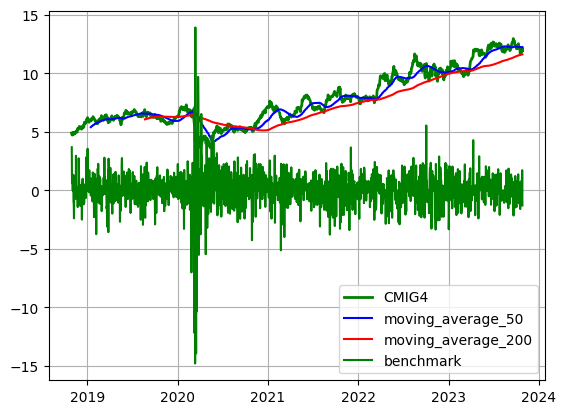

In [127]:
plt.plot(acao['Close'].loc['2016-01-01':], 'g-', label='line 1', linewidth=2)
plt.plot(acao.Close.rolling(50).mean().loc['2016-01-01':], 'b-', label='line 2',)
plt.plot(acao.Close.rolling(200).mean().loc['2016-01-01':], 'r-', label='line 2',)
plt.plot(benchmark['Rentabilidade'].loc['2016-01-01':], 'g-', label='line 2',)

plt.legend(["CMIG4", "moving_average_50", 'moving_average_200', 'benchmark'])
plt.grid(True)

# Salve o gráfico como uma imagem
fig = plt.gcf()
fig.savefig("image.png")

In [129]:
acao_month = acao.resample('7D').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_month

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-29,4.905153,4.969581,4.664619,4.720458,177954935
2018-11-05,4.823543,5.098437,4.660325,4.849315,114610354
2018-11-12,4.926629,5.081258,4.724752,5.055487,75398637
2018-11-19,5.068371,5.386219,4.853610,5.283134,82460515
2018-11-26,5.326086,5.532257,4.982467,5.459238,109965866
...,...,...,...,...,...
2023-09-25,12.641671,12.907708,12.190000,12.410000,43286100
2023-10-02,12.400000,12.510000,11.910000,12.120000,31839000
2023-10-09,12.080000,12.730000,12.060000,12.150000,31202900


In [128]:
acao_month = acao.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_month

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-31,4.905153,4.969581,4.664619,4.737640,144800354
2018-11-30,4.767705,5.532257,4.660325,5.459238,415589953
2018-12-31,5.502189,6.017962,5.171457,6.017962,305179211
2019-01-31,6.013622,6.339270,5.653237,6.013620,448794336
2019-02-28,5.991912,6.504262,5.583766,6.252429,367435143
...,...,...,...,...,...
2023-06-30,11.384220,12.750056,11.238642,12.671230,230647600
2023-07-31,12.700791,12.759910,12.050478,12.484020,147933700
2023-08-31,12.454460,12.710643,11.607084,12.149011,222322500


In [130]:
acao_month = acao.resample('Q').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_month

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,4.905153,6.017962,4.660325,6.017962,865569518
2019-03-31,6.013622,6.504263,5.583766,6.035331,1083420382
2019-06-30,6.035330,7.054012,5.575090,6.655152,942885431
2019-09-30,6.717894,6.986790,6.112881,6.422109,917159423
2019-12-31,6.417627,6.516222,5.467531,6.306375,695273139
2020-03-31,6.320095,7.413078,3.448156,4.074677,1090850621
2020-06-30,4.028946,5.592964,3.466448,5.039611,1282433583
2020-09-30,5.094490,5.794183,4.876437,4.952509,1002999511
2020-12-31,4.952509,7.193397,4.883860,7.139460,876047035
